In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
# Load data
data = pd.read_csv(r"D:\Heart_Disease_Project\data\heart_disease_data_selected_features.csv")
data.head()

,trestbps,oldpeak,slope,ca,age,cp,restecg,target
0,-0.463223,0.547891,0.158878,0.387367,-3.822996,0.075100,1.462671,1
1,1.960742,-0.469716,-0.779695,0.563730,0.288961,-1.583894,0.057067,0
2,1.364005,0.763768,0.837109,-0.861921,2.301433,-0.908260,0.701120,0
3,-0.242281,0.645706,-0.894108,0.504338,2.109940,0.507103,0.728626,0
4,0.860493,-0.625642,-0.067583,0.416376,-2.238280,-2.215166,1.551162,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  212 non-null    float64
 1   oldpeak   212 non-null    float64
 2   slope     212 non-null    float64
 3   ca        212 non-null    float64
 4   age       212 non-null    float64
 5   cp        212 non-null    float64
 6   restecg   212 non-null    float64
 7   target    212 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.4 KB


In [11]:
data.describe()

,trestbps,oldpeak,slope,ca,age,cp,restecg,target
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,212.000000
mean,3.351617e-17,-2.094760e-17,5.446377e-17,8.379042e-18,8.379042e-18,-7.541138e-17,6.284281e-18,0.830189
std,1.016301e+00,7.217905e-01,6.615544e-01,6.081942e-01,1.854861e+00,1.080603e+00,9.208167e-01,1.164008
min,-3.104382e+00,-1.707130e+00,-1.591307e+00,-1.554516e+00,-3.822996e+00,-2.844817e+00,-2.499123e+00,0.000000
25%,-6.814012e-01,-4.750328e-01,-4.588793e-01,-4.246838e-01,-1.522639e+00,-7.369403e-01,-5.221013e-01,0.000000
50%,1.756037e-02,2.650480e-02,2.361966e-02,6.199788e-03,2.610392e-01,1.403643e-01,3.732735e-02,0.000000
75%,6.292824e-01,4.816652e-01,5.081976e-01,4.435636e-01,1.466328e+00,8.070073e-01,5.329512e-01,1.000000
max,2.826851e+00,2.370145e+00,1.369422e+00,1.713043e+00,3.454957e+00,2.452995e+00,2.767233e+00,4.000000


In [12]:
data.isna().sum()

trestbps    0
oldpeak     0
slope       0
ca          0
age         0
cp          0
restecg     0
target      0
dtype: int64

In [13]:
X = data.drop(columns=['target'])
y = data['target']

In [14]:
y.value_counts()

target
0    121
1     42
3     22
2     20
4      7
Name: count, dtype: int64

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.6279
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.12      0.14      0.13         7
           2       0.67      0.50      0.57         4
           3       0.60      0.60      0.60         5

    accuracy                           0.63        43
   macro avg       0.54      0.51      0.52        43
weighted avg       0.64      0.63      0.63        43

Confusion Matrix:
 [[21  5  0  1]
 [ 5  1  1  0]
 [ 0  1  2  1]
 [ 1  1  0  3]]
Random Forest Accuracy: 0.5814
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.00      0.00      0.00         7
           2       0.25      0.25      0.25         4
           3       0.75      0.60      0.67         5

    accuracy                           0.58        43
   macro avg       0.44      0.41      0.42        43
weighted avg       0.58      0.58    

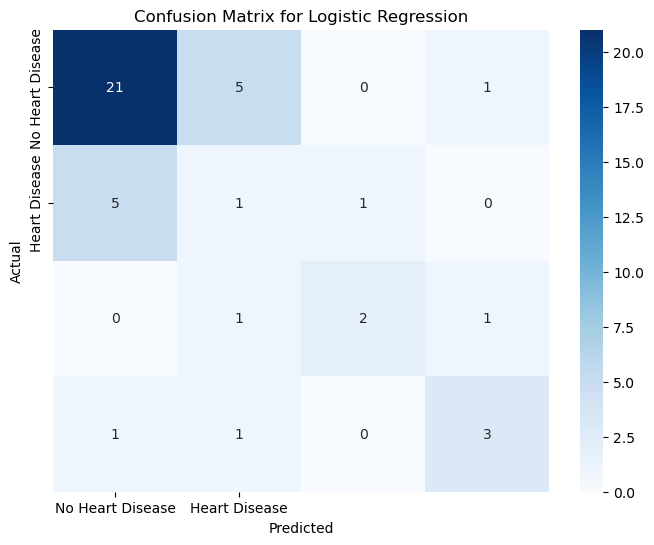

In [17]:
# train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(results[model_name]['classification_report'])
    print("Confusion Matrix:\n", results[model_name]['confusion_matrix'])


# Plot confusion matrix for the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_confusion_matrix = results[best_model_name]['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


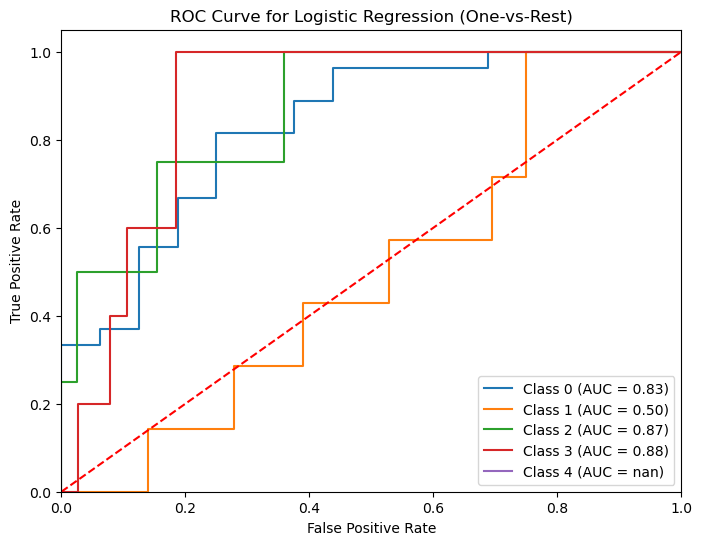

In [19]:
from sklearn.preprocessing import label_binarize

# Binarize the output
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_scores = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_label} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name} (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

In [22]:
# save model 
import joblib
model_path = r"D:\Heart_Disease_Project\models\Logistic_Regression.pkl"
joblib.dump(models['Logistic Regression'], model_path)
print(f"Model saved to {model_path}")

Model saved to D:\Heart_Disease_Project\models\Logistic_Regression.pkl
